# Исходные данные

Таблица с данными за 1980-2016 года

 Колонки:
 
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Задачи

 - Выявить определяющие успешность игры закономерности для вывода потенциально популярного продукта и планирования рекламных кампаний. *Прогноз необходим на 2017 год*
 - Проверить гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Средние пользовательские рейтинги жанров Action и Sports одинаковые

# Ход работы

In [1]:
# импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# открываем файл

try:
    df_games = pd.read_csv('games.csv')
except:
    df_games = pd.read_csv('Сборный проект 1\games.csv')  

## Обзор данных

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info"> 

*Необходима коррекция названия колонок (единый регистр), преобразования типов данных, работа с пропусками в данных*

## Предобработка 

### Переименованиe столбцов

In [5]:
df_games.columns = df_games.columns.str.lower()

###  Пропуски

In [6]:
# columns name&genre

# в колонках названия и жанра всего по 2 пропущенных значения, проверим совпадают ли они по строкам

df_games.query('name.isna() and genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# columns name&genre

# удаляем эти 2 строки, т.к. в них нет ни имени, ни жанра игры - отсутствует важная информация для анализа

df_games = df_games.loc[~df_games['name'].isna()]

In [8]:
# column year_of_release

# заменим пропущенные значения в колонке с годом релиза на 0 для дальнейшей работы с данными

df_games['year_of_release'].fillna(0, inplace=True)
df_games['year_of_release'].isna().sum()

0

In [9]:
# column user_score

# оценим значения колонки

df_games['user_score'].sort_values().unique() 

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [10]:
# column user_score

# tbd - значение будет определено. Как правило используется при анонсах игр (еще не вышедших). 
# проверим даты выхода tbd игр и общее число таких значений 

df_games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


<div class="alert alert-warning">

1. Разнообразие и разброс годов выпуска игр с оценкой пользователей "tbd" не дает сделать нам вывод о том, что это даный показатель указывает на то, что игры еще не вышли.
2. Корреляция между оценкой критиков и пользователей может быть не до конца полной - несмотря на то, что в большинстве случаев есть достаточно сильная связь между этими оценками (из высокой оценки критиков следует соответственно высокая оценка пользователей); есть ряд игр, у которых высокая оценка критиков и низкая оценка пользователей - критики могут более лояльно относиться к играм от крупных издателей, не учитывать множество багов, писать оценку, не проведя в игре достаточное кол-во часов и проч.

Однако для дальнейшей работы с колонкой и проведения математических операций строковое значение "tbd" должно быть заменено.

In [11]:
# column user_score

# будут необходимы математические операции с колонкой, поэтому заменим tbd 

df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = '0'

In [12]:
# column rating

df_games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

<div class="alert alert-warning">

Пропущенные значения рейтинга заполнить адекватно не представляется возможным. Для этого необходима обширная информация о каждой конкретной игре.
Поэтому пропущенные значения будут оставлены.

In [13]:
# проверяем результаты

df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Преобразование типов данных 

In [14]:
# заменим значения года выпуска на целочисленный формат

df_games['year_of_release'] = df_games['year_of_release'].astype('int32')

In [15]:
# заменим строковые значения оценки пользователей на вещественные

df_games['user_score'] = df_games['user_score'].astype('float32')
df_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 0. , 8.8, 6.9, 9.4,
       6.8, 6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1,
       5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1,
       3.5, 2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7], dtype=float32)

### Создание новых колонок 

In [16]:
# создадим колонку по суммарным продажах по всем регионам

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Анализ данных

## Общий выпуск игр по годам 

<AxesSubplot:title={'center':'Распредедение выпуска игр по годам'}, ylabel='Frequency'>

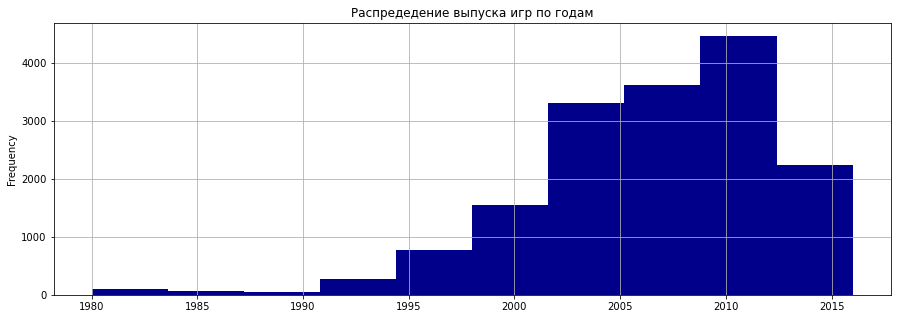

In [17]:
# Исключим нулевые значения для вывода гистограммы.

df_games.loc[df_games['year_of_release'] != 0, 'year_of_release'].plot(kind='hist', 
                                                                       title='Распредедение выпуска игр по годам',
                                                                       figsize=(15,5),
                                                                       grid=True,
                                                                       color='darkblue')

<div class="alert alert-info">

 - Вполне ожидаемо, что в 80-е и начало 90-х вышло довольно мало игр - сфера игр в это время только зарождалась, и делать какие-либо значимые выводы по этому периоду сложно.
 - В середине-конце 90-х начался рост количества выпускаемых игр, а после 2011 года начался спад. 

## Общие продажи по платформам

<AxesSubplot:title={'center':'Распределение игр по платформам'}>

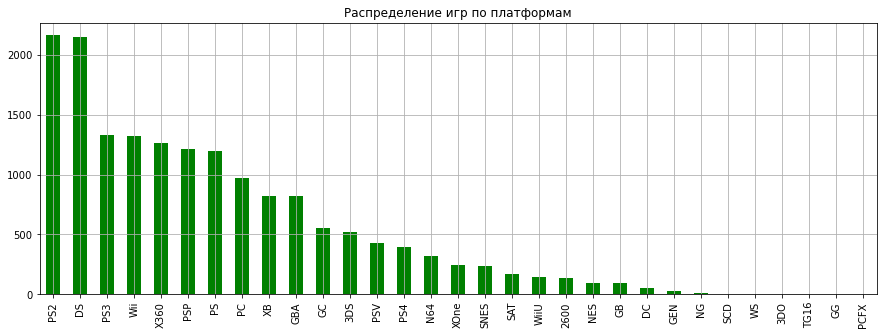

In [18]:
# Построим гисторгамму

df_games['platform'].value_counts().plot(kind='bar',
                                         title='Распределение игр по платформам',
                                         figsize=(15,5),
                                         grid=True,
                                        color='green')

 <div class="alert alert-info">

 - Самые высокие продажи за всю историю наблюдений отмечаются у PS2, DS, PS3, Wii, X360

In [19]:
# сгуппируем данные посредством сводной таблицы и расположим планформы по убыванию проданных млн. копий
# total_sales - общее кол-во проданных копий; year_of_release - релиз первой игры на платформе

platform_pivot = df_games.pivot_table(index='platform', 
                                      values=['total_sales','year_of_release'], 
                                      aggfunc={'total_sales':'sum', 'year_of_release':'first'})

platform_pivot.sort_values(by='total_sales', ascending=False)

,total_sales,year_of_release
platform,,
PS2,1255.77,2004
X360,971.42,2010
PS3,939.65,2013
Wii,907.51,2006
DS,806.12,2006
PS,730.86,1997
GBA,317.85,2002
PS4,314.14,2015
PSP,294.05,2005


In [20]:
# выведем топ-10 самых продаваемых платформ 
# построим цикл, который будет считать разницу между следующим и предыдущим годами; 
# сумму полученных разностей разделим на общее число лет для вывода среднего

platform_pivot = platform_pivot.query('total_sales >= 259.52').sort_values(by='year_of_release')

year_difference=0 # счетчик разностей в годах выпуска успешных платформ
count=0 # счетчик числа лет\индекс по списку
last_year=0 # предыдущий год для того, по которому сейчас идет цикл

for year in platform_pivot['year_of_release'].unique():
    # задаем первый год как последний (из него нечего вычитать, т.к. перед ним нет значений)
    if count==0:
        last_year = year
    # из последующего каждого года вычитаем предыщущий, затем год этой итерации становится вычитаемым для следующего
    # не забываем прибавлять счетчик лет на каждой итерации цикла
    # затем выводим среднее в целочисленном формате
    else:
        year_difference += year-last_year
        last_year=year
    count+=1
mean_diff=int(year_difference/count)

print(f'Новая платформа в среднем появляется каждые {mean_diff} года')

Новая платформа в среднем появляется каждые 2 года


## Анализ платформ

<div class="alert alert-info"> 
    
 - Так как с 2011 года наблюдается общее падение продаж, для прогноза должны быть взяты данные, начиная с 2010 года. 
 - Так как сфера является достаточно быстро меняющейся, возьмем данные за условный цикл-смену популярных платформ, то есть за 2 года - с 2014 по 2016 года.

In [21]:
# отсортируем датасет для анализа

forecast_games=df_games.loc[df_games['year_of_release']>=2014]
forecast_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       981 non-null    float32
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 158.3+ KB


In [22]:
# сделаем отдельно две сводные таблицы - первая за 2010 год до резкого спада, вторая после 2010 - во время спада.
# таблицы будут хранить отсортированные по возрастанию продажи в разбивке по платформам

games_before_crisis = (
df_games
    .query('year_of_release == 2010')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

games_after_crisis = (
forecast_games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

<AxesSubplot:title={'center':'Изменение продаж платформ за год до и после спада выпускаемых игр'}, xlabel='platform'>

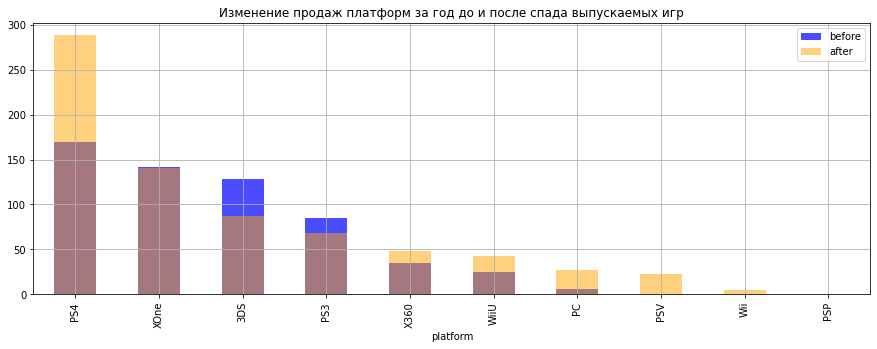

In [23]:
ax = games_before_crisis.plot(
    kind='bar',
    alpha=0.7,
    y='total_sales', 
    figsize=(15,5),
    grid=True,
    label='before',
    color='blue'
)

games_after_crisis.plot(
    title='Изменение продаж платформ за год до и после спада выпускаемых игр',
    ax=ax,
    kind='bar',
    alpha=0.5,
    y='total_sales', 
    figsize=(15,5),
    grid=True,
    label='after',
    legend=True,
    color='orange'
)

<div class="alert alert-info"> 

- Выделяется топ платформ, которые набирали популярность до общего спада кол-ва выпускаемых игр удержали первенство
   - Эти платформы являются потенциально наиболее прибыльными и выгодными:
    - Топ-3: PS4, XOne, 3DS. 
    - Топ-5: PS4, XOne, 3DS, PS3, X360.
При этом 3DS и PS3 были более популярны перед кризисом в 2010 году, чем в последние 2 года. А XOne набрала популярность именно в последние года.   
   
 - Совсем небольшую популярность получили только появившиеся после 2010 года WiiU и PSV. Эти платформы достаточно рискованные для выпуска на них продукта.
 - Топ-3 самых сильно сдавших после 2010 года платформ - это PSV, Wii, PSP. Эти платформы очень рискованны для выпуска на них продукта.

(0.0, 2.0)

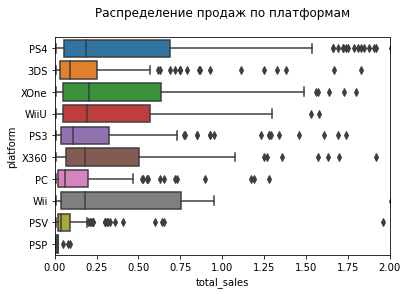

In [24]:
# построим диаграмму размаха

sns.boxplot(data=forecast_games, x='total_sales', y='platform')
plt.title('Распределение продаж по платформам\n')
plt.xlim(0,2)

<div class="alert alert-info">

 - На полученном графике сильно заметны выбросы, соответственно, практически на всех платформах есть общая тенденция - есть сильно выделяющиеся из общей массы игры, которые приносят очень высокую прибыль на общем фоне.
 - У PS4 и Wii наблюдаются самые высокие смещения вправо - на этих платформах наблюдаются самые высокие продажи

### Влияние отзывов

**Посмотрим влияние отзывов на продажи самой популярной платформы - PS4 за необходимый период (после 2014)**

In [25]:
# для дальнейшей работы сохраним в отдельную переменную только те строки датасета, где платформа - PS4, 
# а выбранный период - после 2013 года

after_crisis=df_games.loc[df_games['year_of_release']>=2014]
ps4_games = after_crisis.loc[after_crisis['platform']=='PS4']
ps4_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [26]:
# выведем среднюю оценку

print('Средняя оценка критиками игр платформы PS4: {0}'.format(int(ps4_games['critic_score'].mean())))

print('Средняя оценка пользователями игр платформы PS4: {0}'.format(int(ps4_games['user_score'].mean())))

Средняя оценка критиками игр платформы PS4: 72
Средняя оценка пользователями игр платформы PS4: 6


Text(0.5, 1.0, 'Оценка критиков и продажи PS4\n')

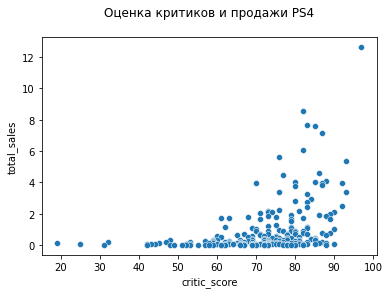

In [27]:
# построим диаграмму размаха

sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales')
plt.title('Оценка критиков и продажи PS4\n')

<div class="alert alert-info">

- Большая часть оценки критиков выше среднего, в этой же область находится большинство продаж. Встречается небольшое кол-во негативных отзывов. Кроме того, игра с самым высоким доходом изначально была оценена критиками очень положительно.

Text(0.5, 1.0, 'Оценка пользоваталей и продажи PS4\n')

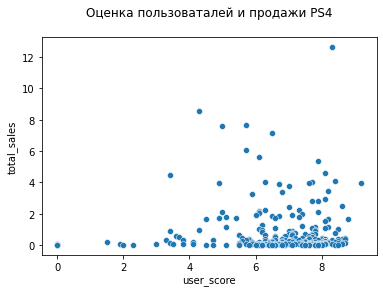

In [28]:
# построим диаграмму размаха

sns.scatterplot(data=ps4_games, x='user_score', y='total_sales')
plt.title('Оценка пользоваталей и продажи PS4\n')

<div class="alert alert-info">

 - Даже при оценке 3 заметна игра с достаточно неплохим доходом - возможно, оценка пользоваталей не всегда важна для хороших продаж.
 - Однако игры с самыми высокими продажами имеют оценку пользователей выше среднего.
Большинство продаж также прихожится на иры с оценкой выше среднего.

In [29]:
# Оценим корреляцию между отзывами и продажами платформы

ps4_critic_corr = ps4_games['critic_score'].corr(ps4_games['total_sales'])
print(f'Корреляция между оценкой критиков и продажами ps4 - {round(ps4_critic_corr, 2)}')

ps4_user_corr = ps4_games['user_score'].corr(ps4_games['total_sales'])
print(f'Корреляция между оценкой пользователей и продажами ps4 - {round(ps4_user_corr, 2)}')

Корреляция между оценкой критиков и продажами ps4 - 0.4
Корреляция между оценкой пользователей и продажами ps4 - 0.02


<div class="alert alert-info">

 - Корреляционная связь между отзывами критиков и продажами чуть ниже среднего - нельзя однозначно сказать, что отзывы критиков имеют сильное влияние на продажи, это влияние достаточно существенный фактором роста продаж.

 - Корреляционная связь между отзывами пользователей и продажами очень слабая - отзывы пользоваталей почти не имеют влиния на продажи.

**Посмотрим на общую корреляционную связь непопулярной платформы, появившейся в этот же период**

In [30]:
psv_games = after_crisis.loc[after_crisis['platform']=='PSV']

# Оценим корреляцию между отзывами и продажами платформы

psv_critic_corr = psv_games['critic_score'].corr(psv_games['total_sales'])
print(f'Корреляция между оценкой критиков и продажами PSV - {round(psv_critic_corr, 2)}')

psv_user_corr = psv_games['user_score'].corr(psv_games['total_sales'])
print(f'Корреляция между оценкой пользователей и продажами PSV - {round(psv_user_corr, 2)}')

Корреляция между оценкой критиков и продажами PSV - 0.04
Корреляция между оценкой пользователей и продажами PSV - 0.13


<div class="alert alert-info">

 - Тут видна очень слабая корреляционная связь между отзывами пользователей и продажами - отзывы почти никак не влияют на п продажи.
 - Влияние отзывов критиков на продажи практически отсутствует

**Посмотрим влияние отзывов по всем платформам, начиная с 2014 года**

In [31]:
# выведем среднюю оценку

print('Средняя оценка критиками: {0}'.format(int(after_crisis['critic_score'].mean())))

print('Средняя оценка пользователями: {0}'.format(int(after_crisis['user_score'].mean())))

Средняя оценка критиками: 72
Средняя оценка пользователями: 5


Text(0.5, 1.0, 'Оценка критиков и продажи в целом\n')

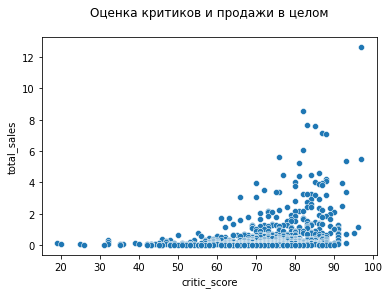

In [32]:
# построим диаграмму размаха

sns.scatterplot(data=after_crisis, x='critic_score', y='total_sales')
plt.title('Оценка критиков и продажи в целом\n')

<div class="alert alert-info">

 - Несмотря на то, что большая часть оценок критиков все еще находится выше среднего, есть некоторая часть игр, имеющих оценку ниже среднего от критиков - такие игры стабильно имеют самые низкие продажи.

Text(0.5, 1.0, 'Оценка пользоваталей и продажи в целом\n')

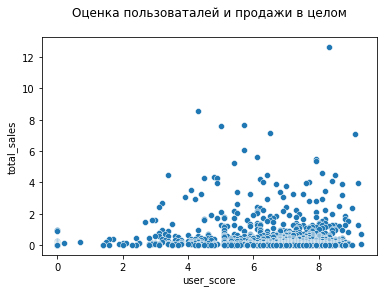

In [33]:
# построим диаграмму размаха

sns.scatterplot(data=after_crisis, x='user_score', y='total_sales')
plt.title('Оценка пользоваталей и продажи в целом\n')

<div class="alert alert-info">
    
 - Отзывы пользователей распределены более размашисто, вновь наблюдается несколько игр, которые, несмотря на оценку ниже среднего имеют неплохие продажи. Однако самые популярные игры стабильно оцениваются выше среднего.

In [34]:
# посмотрим корреляцию

critic_corr = after_crisis['critic_score'].corr(after_crisis['total_sales'])
print(f'Корреляция между оценкой критиков и продажами - {round(critic_corr, 2)}')

user_corr = after_crisis['user_score'].corr(after_crisis['total_sales'])
print(f'Корреляция между оценкой пользователей и продажами - {round(user_corr, 2)}')

Корреляция между оценкой критиков и продажами - 0.33
Корреляция между оценкой пользователей и продажами - 0.1


<div class="alert alert-info">

 - Видно, что в целом отзывы критиков имеют небольшое влияние на продажи - чем выше оценка критиков, тем больше продаж и доходов.
Оценка пользоваталей на продажи не влияет очень слабо

<div class="alert alert-success">

*После изучения отзывов и продаж можно сделать следующие выводы*:
 - Общая оценка критиков и пользователей по всем платформам по большей мере лежит в области выше среднего. 
 - Отзывы критиков имеют ведущее, хотя и не значительное влияние на продажи - игры с низкой оценкой критиков стабильно имеют низкие продажи.
 - Отзывы пользоваталей в целом имеют практически минимальное влияние на продажи - в часности, даже с низкой оценкой пользователей некоторые игры могут добиться среднего уровня продаж; но все же самые высокие доходы наблюдаются у игр, оцененных высоко и пользователями, и критиками одновременно

### Жанры игр и продажи 

In [35]:
# посмотрим на все виды жанров

after_crisis['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

<AxesSubplot:title={'center':'Распеределение продаж по платформам'}, xlabel='genre'>

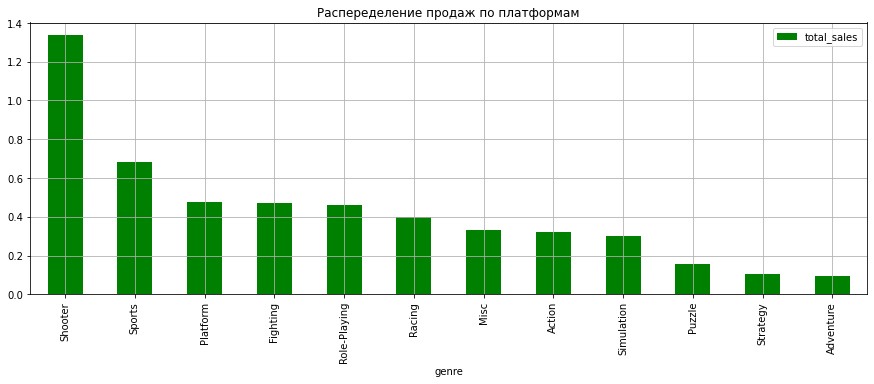

In [36]:
# рассмотрим средние продажи

genre_sales_pivot = (after_crisis
                     .pivot_table(index='genre', values='total_sales')
                     .sort_values(by='total_sales', ascending=False)
                    )
genre_sales_pivot.plot(kind='bar', title='Распеределение продаж по платформам', figsize=(15,5), grid=True, color='green')

<div class="alert alert-info">

 - В топ-3 самых стабильно прибыльных жанров входят: шутер, спортивные игры и платформеры.
 - Топ-3 самых непопулярных жанров - приключения, стратегии и пазлы.

##  Пользователи разных регионов

<div class="alert alert-warning">

Определим для пользователя каждого региона:
 - Самые популярные платформы (топ-5). 
 - Самые популярные жанры (топ-5). 
 - Как влияет рейтинг ESRB на продажи.

### Северная Америка 

<AxesSubplot:title={'center':'Продажи по платформам в Северной Америке в млн.копий\n'}, xlabel='platform', ylabel='sales'>

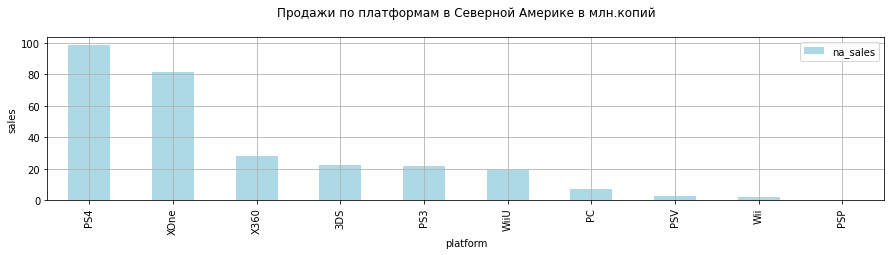

In [37]:
# NA

# выведем кол-во продаж по платформам в Северной Америке в порядке убывания

na_platform = (after_crisis
               .groupby('platform')
               .agg({'na_sales':'sum'})
               .sort_values(by='na_sales', ascending=False)
              )

na_platform.plot(kind='bar', 
                 title='Продажи по платформам в Северной Америке в млн.копий\n',
                 figsize=(15,3),
                 grid=True,
                 color='lightblue',
                 ylabel='sales'
                )

<AxesSubplot:title={'center':'Продажи по жанрам в Северной Америке в млн.копий\n'}, xlabel='genre', ylabel='sales'>

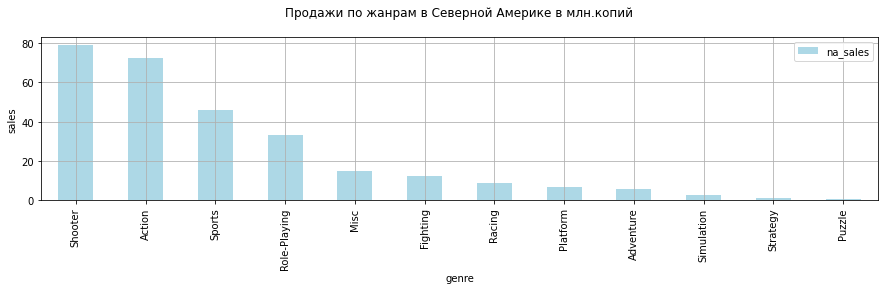

In [38]:
# NA

# выведем кол-во продаж по жанрам в Северной Америке в порядке убывания

na_genre = (after_crisis
            .groupby('genre')
            .agg({'na_sales':'sum'})
            .sort_values(by='na_sales', ascending=False)
           )


na_genre.plot(kind='bar', 
                 title='Продажи по жанрам в Северной Америке в млн.копий\n',
                 figsize=(15,3),
                 grid=True,
                 color='lightblue',
                 ylabel='sales'
                )

<AxesSubplot:title={'center':'Продажи по возрастному рейтингу в Северной Америке в млн.копий\n'}, xlabel='rating', ylabel='sales'>

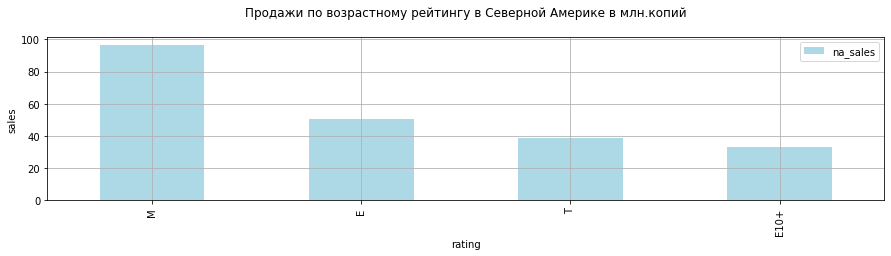

In [39]:
# NA

# выведем кол-во продаж по возрастному рейтингу в Северной Америке в порядке убывания

na_rating = (after_crisis
            .groupby('rating')
            .agg({'na_sales':'sum'})
            .sort_values(by='na_sales', ascending=False)
           )

na_rating.plot(kind='bar', 
                 title='Продажи по возрастному рейтингу в Северной Америке в млн.копий\n',
                 figsize=(15,3),
                 grid=True,
                 color='lightblue',
                 ylabel='sales'
                )

<div class="alert alert-success">

 - В Северной Америке в топ-5 платформ входят: PS4, XOne, X360, 3DS, PS3. Первые 2 платформы находятся в сильном отрыве от других кол-вом пользователей.
 - Топ-5 самых популярных жанры Северной Америки - шутер, экшн, спорт, ролевые игры и misc.
 - Больше всего в Северной Америке пользуются популярностью игры для взрослых, а втором месте игры для всех возрастов, у которых в 2 раза меньше продаж, чем у топ-1. 

### Европа 

<AxesSubplot:title={'center':'Продажи по платформам в Европе в млн.копий\n'}, xlabel='platform', ylabel='sales'>

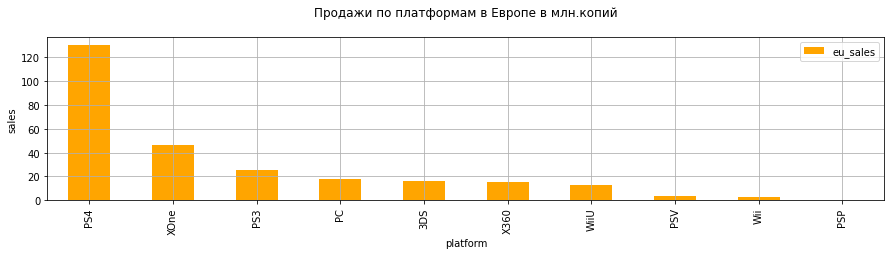

In [40]:
# продажи по платформам в Европе

eu_platform = (after_crisis
               .groupby('platform')
               .agg({'eu_sales':'sum'})
               .sort_values(by='eu_sales', ascending=False)
              )

eu_platform.plot(kind='bar', 
                 title='Продажи по платформам в Европе в млн.копий\n',
                 figsize=(15,3),
                 grid=True,
                 color='orange',
                 ylabel='sales'
                )

<AxesSubplot:title={'center':'Продажи по жанрам в Европе в млн.копий\n'}, xlabel='genre', ylabel='sales'>

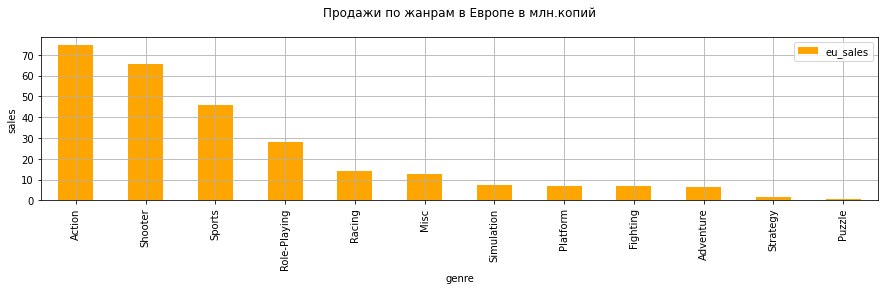

In [41]:
# продажи по жанрам в Европе

eu_genre = (after_crisis
               .groupby('genre')
               .agg({'eu_sales':'sum'})
               .sort_values(by='eu_sales', ascending=False)
              )

eu_genre.plot(kind='bar', 
                 title='Продажи по жанрам в Европе в млн.копий\n',
                 figsize=(15,3),
                 grid=True,
                 color='orange',
                 ylabel='sales'
                )

<AxesSubplot:title={'center':'Продажи по возрастному рейтингу в Европе в млн.копий\n'}, xlabel='rating', ylabel='sales'>

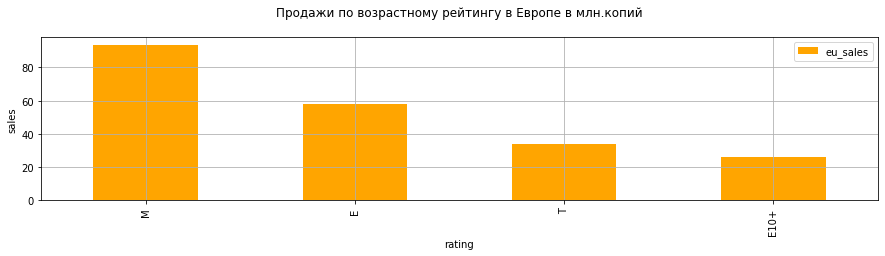

In [42]:
# продажи по возрастному рейтингу в Европе

eu_rating = (after_crisis
               .groupby('rating')
               .agg({'eu_sales':'sum'})
               .sort_values(by='eu_sales', ascending=False)
              )

eu_rating.plot(kind='bar', 
                 title='Продажи по возрастному рейтингу в Европе в млн.копий\n',
                 figsize=(15,3),
                 grid=True,
                 color='orange',
                 ylabel='sales'
                )

<div class="alert alert-success">

 - В топ-5 популярных платформ Европы входят: PS4, XOne, PS3, PC и 3DS. 
 - Топ-5 популярных жанров Европы: экшн, шутер, спорт, ролевые игры и гонки.
 - Самые популярные игры - для взрослых, всех возрастов и подросткам.

### Япония 

<AxesSubplot:title={'center':'Продажи по платформам в Японии в млн.копий\n'}, xlabel='platform', ylabel='sales'>

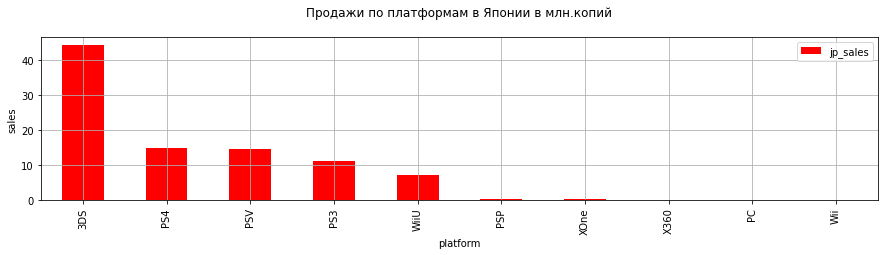

In [43]:
# продажи по платформам в Японии 

jp_platform = (after_crisis
               .groupby('platform')
               .agg({'jp_sales':'sum'})
               .sort_values(by='jp_sales', ascending=False)
              )

jp_platform.plot(kind='bar', 
                 title='Продажи по платформам в Японии в млн.копий\n',
                 figsize=(15,3),
                 grid=True,
                 color='red',
                 ylabel='sales'
                )

<AxesSubplot:title={'center':'Продажи по жанрам в Японии в млн.копий\n'}, xlabel='genre', ylabel='sales'>

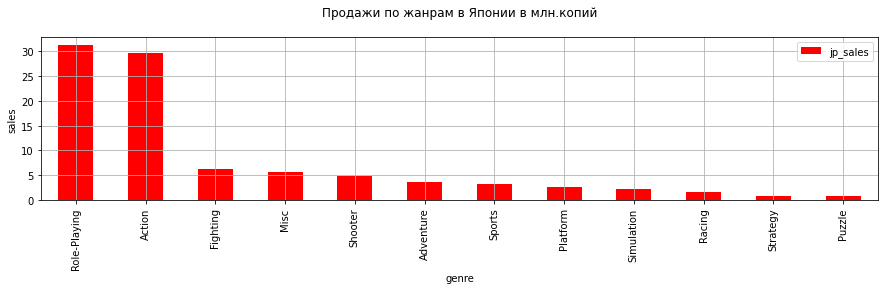

In [44]:
# продажи по жанрам в Японии 

jp_genre = (after_crisis
               .groupby('genre')
               .agg({'jp_sales':'sum'})
               .sort_values(by='jp_sales', ascending=False)
              )

jp_genre.plot(kind='bar', 
                 title='Продажи по жанрам в Японии в млн.копий\n',
                 figsize=(15,3),
                 grid=True,
                 color='red',
                 ylabel='sales'
                )

<AxesSubplot:title={'center':'Продажи по возрастному рейтингу в Японии в млн.копий\n'}, xlabel='rating', ylabel='sales'>

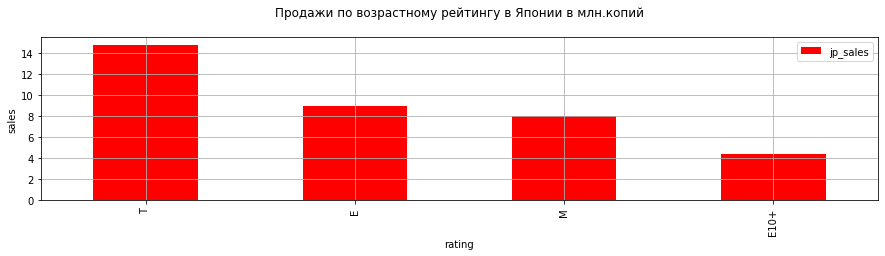

In [45]:
# продажи по возрастному рейтингу в Японии 

jp_rating = (after_crisis
               .groupby('rating')
               .agg({'jp_sales':'sum'})
               .sort_values(by='jp_sales', ascending=False)
              )

jp_rating.plot(kind='bar', 
                 title='Продажи по возрастному рейтингу в Японии в млн.копий\n',
                 figsize=(15,3),
                 grid=True,
                 color='red',
                 ylabel='sales'
                )

<div class="alert alert-success">

 - Топ-5 платформ Японии: 3DS, PS4, PSV, PS3, WiiU. 3DS находится в сильном отрыве по популярности - число ее пользователей практически сопоставимо с числом пользователями других платформ из топ-5.
 - Топ-5 популярных жанров Японии: ролевые игры, экшн, файтинги, misс и шутеры.
 - Больше всего в Японии предпочитают игры для для подростков, затем идут игры для всех возрастов и взрослых.

# Гипотезы 

## Гипотеза 1

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

 - **Нулевая гипотеза H0**: *рейтинги одинаковые* 
 - **Альтернативная гипотеза H1**: *рейтинги не равны* 

In [46]:
# отсортируем 2 массива по данным платформам и сохраним в переменные

xone = df_games.loc[df_games['platform'] == 'XOne']
pc = df_games.loc[df_games['platform'] == 'PC']

# зададим уровень стат. значимости и проверим нулевую гипотезу 

alpha = .05
results = st.ttest_ind(xone['user_score'], pc['user_score'])
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не можем отвергнуть нулевую гипотезу') 

Не можем отвергнуть нулевую гипотезу


<div class="alert alert-success">

*Средние пользовательские рейтинги платформ Xbox One и PC не равны.*

## Гипотеза 2 

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.**

 - **Нулевая гипотеза H0**: *рейтинги одинаковые* 
 - **Альтернативная гипотеза H1**: *рейтинг жанра экшн выше* 

In [47]:
# отсортируем 2 массива по данным жанрам и сохраним в переменные

action = df_games.loc[df_games['genre'] == 'Action']
sport = df_games.loc[df_games['genre'] == 'Sports']

# зададим уровень стат. значимости и проверим нулевую гипотезу 

alpha = .01
results = st.ttest_ind(action['user_score'], sport['user_score'])
if (results.pvalue/2 < alpha) and (sport['user_score'].mean() < action['user_score'].mean()):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не можем отвергнуть нулевую гипотезу')

Не можем отвергнуть нулевую гипотезу


<div class="alert alert-success">

*Средний рейтинг жанра экшн выше рейнига спортивных игр*

# Общий вывод

<div class="alert alert-danger">  

**Общая информация**

 - В 80-е и начало 90-х сфера игр только зарождалась, поэтому в данные период вышло менее всего игр. В середине-конце 90-х начался рост количества выпускаемых игр, а после 2011 года начался спад. 
 - В среднем каждые 2 года появляется новая платформа.
 - Практически на всех платформах есть общая тенденция - наличие сильно выделяющихся из общей массы игр, которые приносят очень высокий доход на общем фоне.
 - В топ-3 самых прибыльных популярных жанров входят: шутер, спортивные игры и платформеры.
 - Топ-3 самых непопулярных жанров - приключения, стратегии и пазлы.
 
**Изменение лидеров в кризис**

 - Выделяется топ платформ, которые набирали популярность до общего спада кол-ва выпускаемых игр удержали первенство. Эти платформы являются потенциально наиболее прибыльными и выгодными:
    - Топ-3: PS4, XOne, 3DS. 
    - Топ-5: PS4, XOne, 3DS, PS3, X360.
При этом 3DS и PS3 были более популярны перед кризисом в 2010 году, чем в последние 2 года. А XOne набрала популярность именно в последние года, поэтому возможно, что в будущем она может завоевать еще большую популярность.    
   
 - Совсем небольшую популярность получили только появившиеся после 2010 года WiiU и PSV. Эти платформы достаточно рискованные для выпуска на них продукта.
 
**Оценка критиками и пользователями**

 - Общая оценка критиков и пользователей по всем платформам после 2014 года лежит в области выше среднего. 
 - Отзывы критиков имеют ведущее, хотя и не значительное влияние на продажи - игры с низкой оценкой критиков стабильно имеют низкие продажи.
 - Отзывы пользоваталей в целом имеют очень слабое влияние на продажи - в часности, даже с низкой оценкой пользователей некоторые игры могут добиться среднего уровня продаж; но все же самые высокие доходы наблюдаются у игр, оцененных высоко и пользователями, и критиками одновременно.

**Отличие пользователей по регионам**

 - Пользователи Америки и Европы в общем имеют довольно схожие черты, пользователи Японии очень сильно от них отличаются.
 - В Европе и Америке предпочитают использовать PS4 и XOne, а в Японии крайне большой популярностью пользуется 3DS.
 - Экшн достаточно популярный жанр для всех регионов, но в Северной Америке чуть более популярен шутер, а в Японии - ролевые игры.
 - Пользователи Европы и Америки предпочитают игры для взрослых и всех возрастов, в Японии в первую очередь популярностью пользуются игры для подростков, а затем игры для всех возрастов.
 
**Мнение о потентиально прибыльном продукте**

 - Игры жанра экшн будут одинаково хорошо встречены во всех регионах. При упоре на Японию стоит больше внимания уделить ролевым играм.
 - Предпочтительно выпускать игры на PS4 или XOne на общий рынок, либо на 3DS сугубо для Японии.
 - Для общего рынка самым лучшим выбором будет игра для всех возрастов, для Европы и Америки - для взрослых, а для Японии - для подростков.
 - Мнение критиков об игре будет в средней степени влиять на продажи, а для максимального дохода необходимо хорошее мнение об игре и от критиков, и от пользователей.